# Exercise 2

##  KNN Classifier

In this exercise we implement the KNN for classification of the Iris dataset

First, understand the dataset and its contents by finding the keys and reading the description of the dataset by running the code block below. Then answer the following questions.

In [14]:
import numpy as np
from sklearn.datasets import load_iris
iris_dataset=load_iris() #creates an object that contains the iris dataset
print('Keys of the iris_dataset is:', iris_dataset.keys())

Keys of the iris_dataset is: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


print(iris_dataset.DESCR)

#### A) To better understand the stucture of the dataset, answer the following
1. Find type and shape of ‘data’ in the Iris_dataset
2. Print the first five rows of ‘data’ 
3. Print the feature_names
4. Print the target_names
5. print type and shape of 'target'
6. Print first 10 values of the target, then print the unique values using np.unique(iris_dataset['target'])


In [15]:

iris_dataset.data.shape


(150, 4)

In [16]:
type(iris_dataset.data)

numpy.ndarray

In [17]:
print(iris_dataset.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [18]:
print(iris_dataset.target_names)

['setosa' 'versicolor' 'virginica']


In [19]:
iris_dataset.target.shape


(150,)

In [20]:
type(iris_dataset.target)

numpy.ndarray

In [21]:
print(iris_dataset.target[0:10])

[0 0 0 0 0 0 0 0 0 0]


In [22]:
np.unique(iris_dataset.target)

array([0, 1, 2])

#### B) Classify the Iris species with KNN approach using the first two feature only (X_train[:, : 2], X_test[:, : 2]), and check the accuracy as K changes. Let K takes the values [1, 5, 10, 15]. No need to scale features.
In the code, use random_state=100 in train_test_split as below.

Plot the accuracy versus K and comment on your result

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


test_accuracy=[] # you can use the .append to test_accuracy to store the result
X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset.data[:,:2],iris_dataset['target'],random_state=100)

#complete your code here
neighbours=[1,5,10,15]
for i in neighbours:
    
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,Y_train)
    accuracy=knn.score(X_test,Y_test)
    test_accuracy.append(accuracy)



[0.7368421052631579, 0.8421052631578947, 0.8421052631578947, 0.7631578947368421]


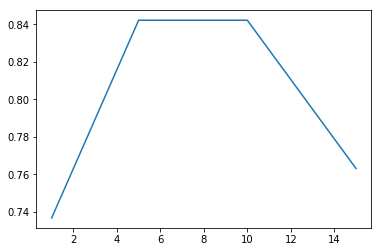

In [31]:
print(test_accuracy)
plt.plot(neighbours,test_accuracy)


 in the graph above , we see that when the K value is low it's a clear sign of overfitting while when K goes above 10 , as the plateau begins the downward motion in the graph, we see underfitting as the model isn't specific enough.
 The optimum values of K seem to be between 4 and 10 for the above scenario.


#### C) Use the Iris example, and find the accuracy of the KNN approach with K=5 when different number of features is used without scaling. 

- Hint: Here we just take features by the order they appear in the dataset. No feature selection. To use N_features only from training data use: X_train[:, : N_features ]

print then plot the accuracy verus the number of feature (i.e. when using one, two, three, and the four features)


[0.7894736842105263, 0.8421052631578947, 0.9210526315789473, 0.9736842105263158]


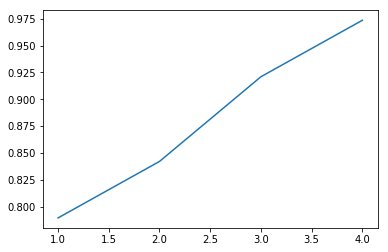

In [28]:
# You can write you code here
test2_accuracy=[] 


#complete your code here
features=[1,2,3,4]
for i in features:
    X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset.data[:,:i],iris_dataset['target'],random_state=100)
    knn=KNeighborsClassifier(5)
    knn.fit(X_train,Y_train)
    accuracy=knn.score(X_test,Y_test)
    test2_accuracy.append(accuracy)
print(test2_accuracy)
plt.plot(features,test2_accuracy)

#### D) Repeat C when feature scaling with MinMaxScaler is used. Comment on your result (comparing D and C)

In [1]:
# You can write you code here

0.7894736842105263
0.8421052631578947
0.9736842105263158
0.9736842105263158
[0.7894736842105263, 0.8421052631578947, 0.9736842105263158, 0.9736842105263158]


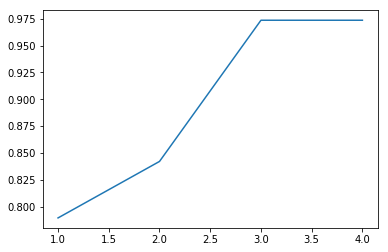

In [29]:
test3_accuracy=[] 


#complete your code here
features=[1,2,3,4]
for i in features:
    X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset.data[:,:i],iris_dataset['target'],random_state=100)
    scaler=preprocessing.MinMaxScaler().fit(X_train)
    X_trainscaled=scaler.transform(X_train)
    X_testscaled=scaler.transform(X_test)
    knn=KNeighborsClassifier(5)
    knn.fit(X_trainscaled,Y_train)
    accuracy=knn.score(X_testscaled,Y_test)
    print(accuracy)
    test3_accuracy.append(accuracy)
print(test3_accuracy)
plt.plot(features,test3_accuracy)


In case C) we are using feature selection without scaling and we see as the number of features increases the accuracy increases as we can define the model better. 
in case D) we perform feature Selection as well as scaling , there's an improvement when the number of features is 3 as the accuracy reaches 0.97 here itself and plateaus from there on out.